-Capture Rate-Total is the measure of how much of the targeted materials are actually recycled, which is a measure of how successfully such materials are recycled

# Some questions
## can we find the best zone for each year (want to average the capture rates over the whole years to compare)
-Can we find the best community district for each zone in each year
-looking at months are some months better than others at recycling? is there a certain time of year? like January right after christmas when we have a lot more paper waste? 
-are any areas getting significantly worse than others over the years?

-maybe looking at the diversion rate to determine who is producing the most trash that is not recyclable
   (diversion rate and capture rate or some calculations???? dont think it can be done)
   
Capture rate is the amount of materials set out for residential recycling collection as a percentage of designated recyclable materials in both recycling and refuse streams. This ratio measures how much of the targeted materials are actually being recycled, which is a measure of how successfully such materials are recycled. 

Recycling Diversion rate (percentage of total municipal solid waste collected by the Department of Sanitation that is disposed of by recycling) and Capture Rate (percentage of total Paper or Metal/Glass/Plastic in the waste stream that is disposed of by recycling)

## Importing data, renaming the column names, understanding the dataframe

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data
df = pd.read_csv('NYC_Recycle.csv')

In [3]:
df.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2
2,Brooklyn North,BKN03,10,2019,April,12.2,33.5,44.9,38.2
3,Brooklyn North,BKN04,10,2019,April,15.5,35.2,68.5,48.8
4,Brooklyn North,BKN05,10,2019,April,10.1,22.3,45.1,31.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 9 columns):
Zone                                                                                       2832 non-null object
District                                                                                   2832 non-null object
Fiscal Month Number                                                                        2832 non-null int64
Fiscal Year                                                                                2832 non-null int64
Month Name                                                                                 2832 non-null object
Diversion Rate-Total (Total Recycling / Total Waste)                                       2832 non-null float64
Capture Rate-Paper (Total Paper / Max Paper)                                               2832 non-null float64
Capture Rate-MGP (Total MGP / Max MGP)                                                     2832 non-null float

In [5]:
#renaming dataframe columns to make the code easier to read
df.rename(columns = {'Diversion Rate-Total (Total Recycling / Total Waste)':'Diversion Rate-Total','Capture Rate-Paper (Total Paper / Max Paper)':'Capture Rate-Paper','Capture Rate-MGP (Total MGP / Max MGP)':'Capture Rate-MGP','Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100':'Capture Rate-Total'}, inplace = True) 

In [6]:
df.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total,Capture Rate-Paper,Capture Rate-MGP,Capture Rate-Total
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2
2,Brooklyn North,BKN03,10,2019,April,12.2,33.5,44.9,38.2
3,Brooklyn North,BKN04,10,2019,April,15.5,35.2,68.5,48.8
4,Brooklyn North,BKN05,10,2019,April,10.1,22.3,45.1,31.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 9 columns):
Zone                    2832 non-null object
District                2832 non-null object
Fiscal Month Number     2832 non-null int64
Fiscal Year             2832 non-null int64
Month Name              2832 non-null object
Diversion Rate-Total    2832 non-null float64
Capture Rate-Paper      2832 non-null float64
Capture Rate-MGP        2832 non-null float64
Capture Rate-Total      2832 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 199.2+ KB


In [8]:
df['Fiscal Year'].value_counts()

2019    708
2017    708
2018    708
2016    708
Name: Fiscal Year, dtype: int64

In [9]:
df['Zone'].value_counts()

Bronx             576
Manhattan         576
Brooklyn North    432
Brooklyn South    432
Queens West       336
Queens East       336
Staten Island     144
Name: Zone, dtype: int64

## What is the best Zone for recycling?

Want to get the average of the capture rate-total for each year for each zone and plot them on a scatterplot 


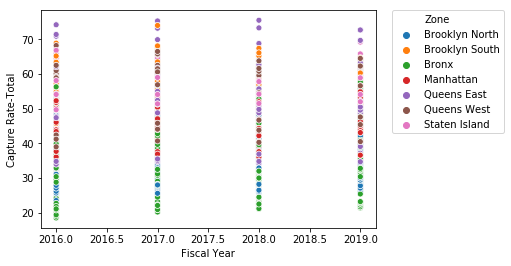

In [10]:
sns.scatterplot(x='Fiscal Year', y='Capture Rate-Total', hue = 'Zone',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This initial plot of Capture Rate-Total over the 4 years gives an idea that the Bronx and Brooklyn North produce the least amount of recyclable material, while Queens East and Brooklyn South produce the most. This will be looked at closer with a less cluttered plot later on. 

In [11]:
# Dataframes based on Zone
df_Manhattan = df[df['Zone']=='Manhattan']
df_Bronx = df[df['Zone']=='Bronx']
df_BrooklynSouth = df[df['Zone']=='Brooklyn South']
df_BrooklynNorth = df[df['Zone']=='Brooklyn North']
df_QueensWest = df[df['Zone']=='Queens West']
df_QueensEast = df[df['Zone']=='Queens East']
df_StatenIsland = df[df['Zone']=='Staten Island']

In [12]:
# Calculating the mean Capture Rate Total for each year for each Zone dataframe
Av_CRT_Manhattan = df_Manhattan.groupby('Fiscal Year')['Capture Rate-Total'].mean()
Av_CRT_Bronx = df_Bronx.groupby('Fiscal Year')['Capture Rate-Total'].mean()
Av_CRT_BrooklynSouth = df_BrooklynSouth.groupby('Fiscal Year')['Capture Rate-Total'].mean()
Av_CRT_BrooklynNorth = df_BrooklynNorth.groupby('Fiscal Year')['Capture Rate-Total'].mean()
Av_CRT_QueensWest = df_QueensWest.groupby('Fiscal Year')['Capture Rate-Total'].mean()
Av_CRT_QueensEast = df_QueensEast.groupby('Fiscal Year')['Capture Rate-Total'].mean()
Av_CRT_StatenIsland = df_StatenIsland.groupby('Fiscal Year')['Capture Rate-Total'].mean()

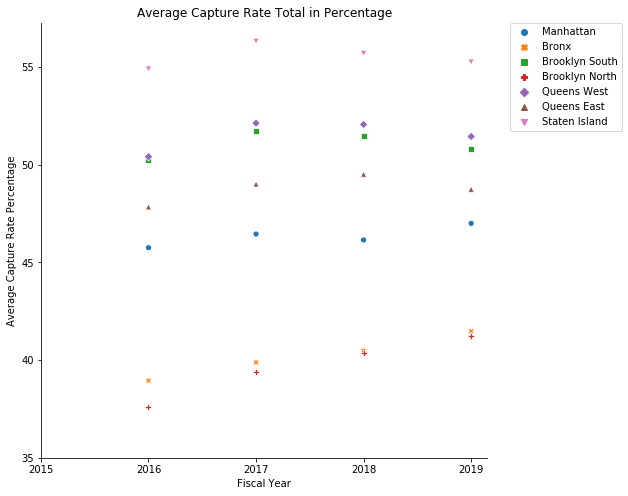

In [13]:
# Combining the dataframes to plot
Average_CaptureRateTotal = pd.DataFrame({'Manhattan': Av_CRT_Manhattan, 'Bronx': Av_CRT_Bronx, 'Brooklyn South': Av_CRT_BrooklynSouth,'Brooklyn North': Av_CRT_BrooklynNorth,'Queens West': Av_CRT_QueensWest, 'Queens East': Av_CRT_QueensEast, 'Staten Island':Av_CRT_StatenIsland})

plt.figure(figsize=(8,8))
sns.scatterplot(data=Average_CaptureRateTotal)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(np.arange(35,60,5))
plt.xticks(np.arange(2015,2020, 1))
plt.title('Average Capture Rate Total in Percentage')
plt.ylabel('Average Capture Rate Percentage')
plt.show()

The results show when you take the averages over each year (12 data points/month) a difference compared to the plot of all the data. The averages show that each year Staten Island is consistently (over 4 years) the best at producing the most recyclables, while Brooklyn North has been consisently the worst. These differences are most likely due to the range of the data points influencing the average. Meaning Queens East and the Bronx have larger ranges causing their averages to be lower and outliers in datapoints.

In [21]:
# Show the larger spread between the min and max are the reason for the differences/conclusions between graph 1 and 2
CRT_Manhattan_min = df_Manhattan.groupby('Fiscal Year')['Capture Rate-Total'].min()
CRT_Manhattan_max = df_Manhattan.groupby('Fiscal Year')['Capture Rate-Total'].max()

CRT_Bronx_min = df_Bronx.groupby('Fiscal Year')['Capture Rate-Total'].min()
CRT_Bronx_max = df_Bronx.groupby('Fiscal Year')['Capture Rate-Total'].max()

CRT_BrooklynSouth_min = df_BrooklynSouth.groupby('Fiscal Year')['Capture Rate-Total'].min()
CRT_BrooklynSouth_max = df_BrooklynSouth.groupby('Fiscal Year')['Capture Rate-Total'].max()

CRT_BrooklynNorth_min = df_BrooklynNorth.groupby('Fiscal Year')['Capture Rate-Total'].min()
CRT_BrooklynNorth_max = df_BrooklynNorth.groupby('Fiscal Year')['Capture Rate-Total'].max()

CRT_QueensWest_min = df_QueensWest.groupby('Fiscal Year')['Capture Rate-Total'].min()
CRT_QueensWest_max = df_QueensWest.groupby('Fiscal Year')['Capture Rate-Total'].max()

CRT_QueensEast_min = df_QueensEast.groupby('Fiscal Year')['Capture Rate-Total'].min()
CRT_QueensEast_max = df_QueensEast.groupby('Fiscal Year')['Capture Rate-Total'].max()

CRT_StatenIsland_min = df_StatenIsland.groupby('Fiscal Year')['Capture Rate-Total'].min()
CRT_StatenIsland_max = df_StatenIsland.groupby('Fiscal Year')['Capture Rate-Total'].max()

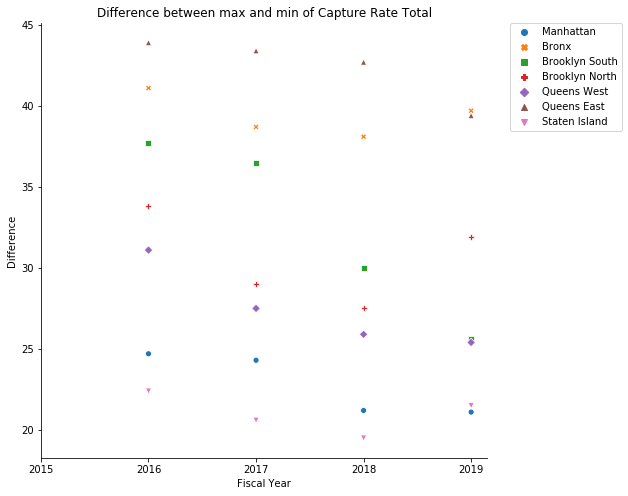

In [39]:
# Max-min to show the difference in the dataframes Bronx and Queens east should have a larger difference

Manhattan_diff = CRT_Manhattan_max.subtract(CRT_Manhattan_min) 
Bronx_diff = CRT_Bronx_max.subtract(CRT_Bronx_min)
BrooklynSouth_diff = CRT_BrooklynSouth_max.subtract(CRT_BrooklynSouth_min)
BrooklynNorth_diff = CRT_BrooklynNorth_max.subtract(CRT_BrooklynNorth_min)
QueensWest_diff = CRT_QueensWest_max.subtract(CRT_QueensWest_min)
QueensEast_diff = CRT_QueensEast_max.subtract(CRT_QueensEast_min) 
StatenIsland_diff = CRT_StatenIsland_max.subtract(CRT_StatenIsland_min)  

Difference = pd.DataFrame({'Manhattan': Manhattan_diff,'Bronx':Bronx_diff,'Brooklyn South':BrooklynSouth_diff,
                           'Brooklyn North':BrooklynNorth_diff,'Queens West':QueensWest_diff,
                           'Queens East':QueensEast_diff,'Staten Island': StatenIsland_diff})
                                        
    
plt.figure(figsize=(8,8))
sns.scatterplot(data=Difference)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(np.arange(20,50,5))
plt.xticks(np.arange(2015,2020, 1))
plt.title('Difference between max and min of Capture Rate Total')
plt.ylabel('Difference')
plt.show()

The difference between the min and max shows that the largest difference is for Queens East and the Bronx. This explains why from Graph 1 they look like the best/worst performers and in Graph 2 end up in the middle. 

# Best Community District for each zone?
-Can we find the best community district for each zone in each year

In [ ]:
#may not need

Average_Min_Max = pd.DataFrame({'Manhattan Min':CRT_Manhattan_min,'Manhattan Max':CRT_Manhattan_max, 
                                'Bronx Min':CRT_Bronx_min,'Bronx Max':CRT_Bronx_max,
                                'Brooklyn South Min':CRT_BrooklynSouth_min,'Brooklyn South Max':CRT_BrooklynSouth_max,
                               'Brooklyn North Min': CRT_BrooklynNorth_min, 'Brooklyn North Max': CRT_BrooklynNorth_max,
                                'Queens West Min':CRT_QueensWest_min,'Queens West Max':CRT_QueensWest_max,
                                'Queens East Min':CRT_QueensWest_min,'Queens East Max':CRT_QueensWest_max,
                                'Staten Island Min':CRT_StatenIsland_min,'Staten Island Max':CRT_StatenIsland_max})

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

plt.figure(figsize=(8,8))
sns.scatterplot(data=Average_Min_Max, markers=filled_markers)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(np.arange(20,60,5))
plt.xticks(np.arange(2015,2020, 1))
plt.title('Min/Max Average Capture Rate Total in Percentage')
plt.ylabel('Average Capture Rate Percentage')
plt.show()

In [ ]:
#12 months to take the average of, find the min and max month of each year too (not just value)